In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import library

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr
import scipy.stats as stats
from statsmodels.formula.api import ols


In [ ]:
amazon_df = pd.read_csv('/content/drive/MyDrive/STAT/AMZN_Clean.csv', parse_dates=['Date'])  # Contains 'Date' and 'Close' columns
amazon_df['Date'] = amazon_df['Date'].dt.tz_localize(None)
ecommerce_df = pd.read_csv('/content/drive/MyDrive/STAT/ECOMPCTSA.csv', parse_dates=['DATE'])  # Contains 'DATE' and 'ECOMPCTSA' columns
ecommerce_df.columns=["Date", "ECOMPCTSA"]
ecommerce_df['Date'] = ecommerce_df['Date'].dt.tz_localize(None)


# Convert Date columns to datetime
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])
ecommerce_df['DATE'] = pd.to_datetime(ecommerce_df['Date'])

amazon_df

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
0,0,2019-01-02,76.956497,76.956497,77.667999,73.046501,73.260002,159662000
1,1,2019-01-03,75.014000,75.014000,76.900002,74.855499,76.000504,139512000
2,2,2019-01-04,78.769501,78.769501,79.699997,75.915497,76.500000,183652000
3,3,2019-01-07,81.475502,81.475502,81.727997,79.459503,80.115501,159864000
4,4,2019-01-08,82.829002,82.829002,83.830498,80.830498,83.234497,177628000
...,...,...,...,...,...,...,...,...
1253,1253,2023-12-22,153.419998,153.419998,154.350006,152.710007,153.770004,29480100
1254,1254,2023-12-26,153.410004,153.410004,153.979996,153.029999,153.559998,25067200
1255,1255,2023-12-27,153.339996,153.339996,154.779999,153.119995,153.559998,31434700
1256,1256,2023-12-28,153.380005,153.380005,154.080002,152.949997,153.720001,27057000


In [ ]:
ecommerce_df

,Date,ECOMPCTSA,DATE
0,2019-04-01,10.3,2019-04-01
1,2019-07-01,10.7,2019-07-01
2,2019-10-01,11.2,2019-10-01
3,2020-01-01,11.9,2020-01-01
4,2020-04-01,16.4,2020-04-01
5,2020-07-01,14.8,2020-07-01
6,2020-10-01,15.0,2020-10-01
7,2021-01-01,14.8,2021-01-01
8,2021-04-01,14.6,2021-04-01
9,2021-07-01,14.5,2021-07-01


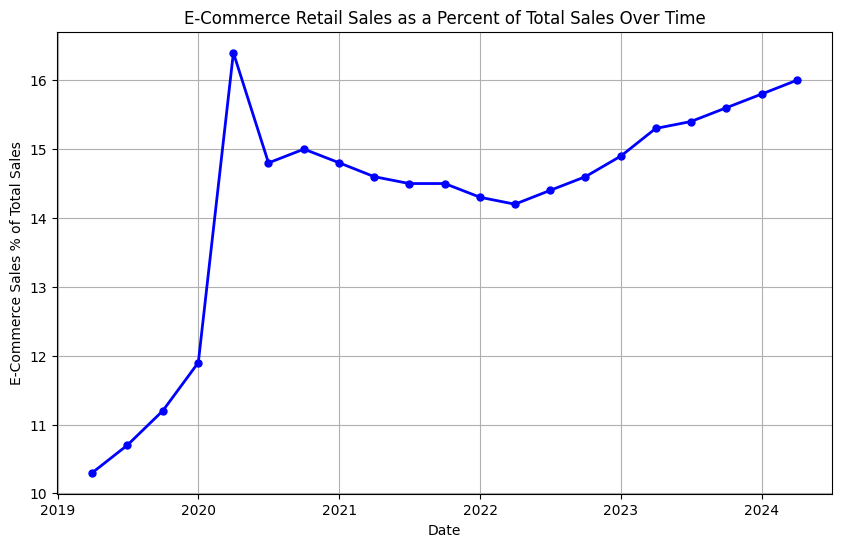

In [ ]:
# Ensure 'Date' is in datetime format (if not already)
ecommerce_df['Date'] = pd.to_datetime(ecommerce_df['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ecommerce_df['Date'], ecommerce_df['ECOMPCTSA'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('E-Commerce Retail Sales as a Percent of Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('E-Commerce Sales % of Total Sales')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     4.257
Date:                Wed, 13 Nov 2024   Prob (F-statistic):             0.0691
Time:                        09:22:20   Log-Likelihood:                -52.013
No. Observations:                  11   AIC:                             108.0
Df Residuals:                       9   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4437     66.276     -0.067      0.9

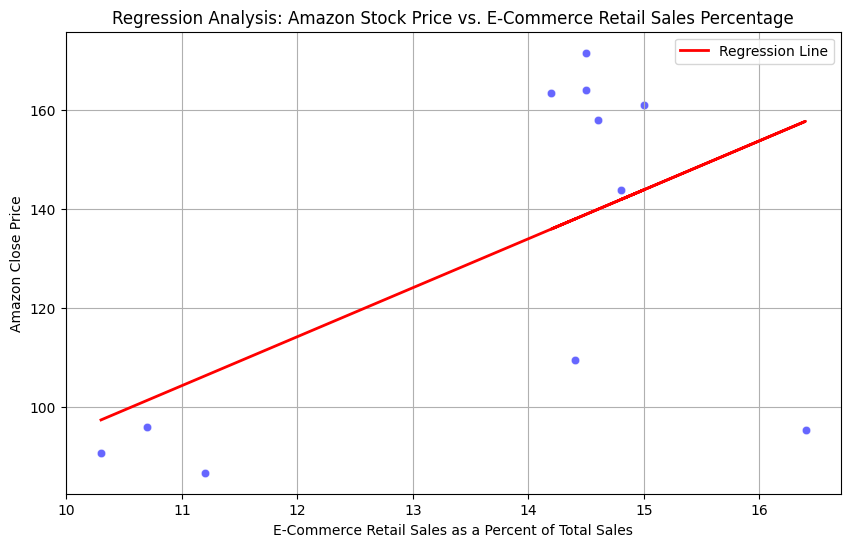

In [ ]:
amazon_df = pd.read_csv('/content/drive/MyDrive/STAT/AMZN_Clean.csv', parse_dates=['Date'])  # Contains 'Date' and 'Close' columns
amazon_df['Date'] = amazon_df['Date'].dt.tz_localize(None)
ecommerce_df = pd.read_csv('/content/drive/MyDrive/STAT/ECOMPCTSA.csv', parse_dates=['DATE'])  # Contains 'DATE' and 'ECOMPCTSA' columns
ecommerce_df.columns=["Date", "ECOMPCTSA"]
ecommerce_df['Date'] = ecommerce_df['Date'].dt.tz_localize(None)


# Convert Date columns to datetime
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])
ecommerce_df['DATE'] = pd.to_datetime(ecommerce_df['Date'])

# Merge datasets on 'Date'
merged_df = pd.merge(amazon_df[['Date', 'Close']], ecommerce_df[['Date', 'ECOMPCTSA']], on='Date')

# Independent and Dependent Variables
X = merged_df['ECOMPCTSA']  # Independent variable: E-commerce retail sales percentage
Y = merged_df['Close']      # Dependent variable: Amazon stock price (Close)

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(Y, X).fit()

# Print the regression results
print(model.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ECOMPCTSA', y='Close', data=merged_df, color='blue', alpha=0.6)
plt.plot(merged_df['ECOMPCTSA'], model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('E-Commerce Retail Sales as a Percent of Total Sales')
plt.ylabel('Amazon Close Price')
plt.title('Regression Analysis: Amazon Stock Price vs. E-Commerce Retail Sales Percentage')
plt.legend()
plt.grid(True)
plt.show()


### Relationship Between Variables:

- The positive coefficient for E-Commerce Retail Sales as a Percent of Total Sales (ECOMPCTSA) suggests that as the percentage of retail sales attributed to e-commerce increases, Amazon's stock price also tends to rise. Specifically, for each 1% increase in e-commerce retail sales, Amazon's stock price is expected to increase by approximately 9.89 points.
- This relationship aligns with the understanding that Amazon, as a major e-commerce player, likely benefits from overall growth in e-commerce activity.

### Statistical Significance:

- The p-value for the ECOMPCTSA variable is 0.069, which is slightly above the conventional 0.05 threshold for statistical significance. This suggests that while there is some evidence of a positive relationship between e-commerce retail sales and Amazon's stock price, the relationship is not strong enough to be considered statistically significant at the 5% level.
- This could indicate that other factors not included in this model may also significantly influence Amazon's stock price.

### Model Fit (R-squared):

- The R-squared value of 0.321 indicates that approximately 32.1% of the variability in Amazon's stock price can be explained by changes in e-commerce retail sales percentage. While this suggests a moderate fit, it also implies that there are other factors contributing to the remaining 67.9% of the variability.
- This moderate R-squared value is typical in financial data analysis, where stock prices are influenced by a wide range of factors, such as economic conditions, company performance, and broader market trends.

### Residual Analysis:

- The residuals in the plot (differences between the actual stock prices and the regression line) show some variability, suggesting that while the trend is upward, the actual data points are somewhat dispersed around the regression line. This could imply that while e-commerce sales growth has a positive influence, other unpredictable factors also impact Amazon's stock price.

### Interpretation of the Scatter Plot:

- The scatter plot shows a generally upward trend, with a regression line illustrating the positive correlation between e-commerce retail sales growth and Amazon’s stock price.
- However, some data points deviate significantly from the line, especially at higher and lower values, highlighting the presence of noise or other variables influencing Amazon's stock performance.

### Summary:
- While there is an observable positive relationship between e-commerce retail sales percentage and Amazon's stock price, the association is moderate and not statistically significant at the 5% level. This suggests that e-commerce growth may influence Amazon's stock price, but other external factors are also likely at play.


In [ ]:


# Assuming `merged_df` is the merged DataFrame with 'ECOMPCTSA' and 'Close' columns
pearson_corr, pearson_p_value = pearsonr(merged_df['ECOMPCTSA'], merged_df['Close'])
spearman_corr, spearman_p_value = spearmanr(merged_df['ECOMPCTSA'], merged_df['Close'])

print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")

# Interpretation:
if pearson_p_value < 0.05:
    print("Reject the null hypothesis. There is a significant correlation between ECOMPCTSA and Amazon’s stock price.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between ECOMPCTSA and Amazon’s stock price.")


Pearson Correlation: 0.5666634945741216, p-value: 0.06911861922817288
Spearman Correlation: 0.3416865356836539, p-value: 0.30374123543992293
Fail to reject the null hypothesis. There is no significant correlation between ECOMPCTSA and Amazon’s stock price.


### Pearson Correlation:
- **Pearson Correlation Coefficient**: 0.5667
- **p-value**: 0.0691

### Spearman Correlation:
- **Spearman Correlation Coefficient**: 0.3417
- **p-value**: 0.3037

### Analysis:
#### Pearson Correlation Interpretation:
- The Pearson correlation coefficient of 0.5667 indicates a moderate positive linear relationship between ECOMPCTSA and Amazon's stock price.
- However, the p-value of 0.0691 is slightly above the typical significance threshold of 0.05. This means that, statistically, we do not have strong enough evidence to conclude that this relationship is significant at the 5% significance level.

#### Spearman Correlation Interpretation:
- The Spearman correlation coefficient is 0.3417, which suggests a weak positive monotonic relationship between the two variables. Spearman correlation is used when the data may not follow a normal distribution or if the relationship is not strictly linear.
- The p-value for the Spearman correlation is 0.3037, which is well above the 0.05 threshold, indicating that the correlation is not statistically significant.

### Conclusion:
- **Fail to Reject the Null Hypothesis**: Since both p-values are above 0.05, we fail to reject the null hypothesis for both Pearson and Spearman correlations. This means there is no statistically significant correlation between ECOMPCTSA and Amazon’s stock price at the 5% significance level.
- **Implications**: Although there is a moderate positive Pearson correlation, it is not statistically significant. This suggests that while Amazon's stock price may have some tendency to increase with higher e-commerce sales, other factors likely play a more substantial role in influencing the stock price. The weak Spearman correlation also supports this conclusion, indicating a weak monotonic relationship.

### Summary:
In summary, while there may be a moderate positive correlation between ECOMPCTSA and Amazon's stock price, it is not strong enough to be statistically significant, implying that e-commerce retail sales alone may not be a decisive factor in predicting Amazon’s stock performance.


In [ ]:
merged_df['ECOMPCTSA_Group'] = pd.qcut(merged_df['ECOMPCTSA'], q=3, labels=['Low', 'Medium', 'High'])

# Step 2: Run one-way ANOVA
# Use statsmodels for ANOVA
model = ols('Close ~ C(ECOMPCTSA_Group)', data=merged_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("One-Way ANOVA Results:")
print(anova_table)

# Interpretation
p_value = anova_table['PR(>F)'][0]
alpha = 0.05

if p_value < alpha:
    print("\nReject the null hypothesis. There is a significant difference in Amazon’s stock price across ECOMPCTSA groups.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in Amazon’s stock price across ECOMPCTSA groups.")


One-Way ANOVA Results:
                         sum_sq   df         F    PR(>F)
C(ECOMPCTSA_Group)  3095.896860  2.0  1.369396  0.307991
Residual            9043.102419  8.0       NaN       NaN

Fail to reject the null hypothesis. There is no significant difference in Amazon’s stock price across ECOMPCTSA groups.


<ipython-input-56-f195d09dc23a>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


## ANOVA Summary:

- **Sum of Squares (sum_sq)**: This represents the variability in Amazon's stock price that is explained by the **ECOMPCTSA_Group** (categorized e-commerce retail sales percentage) and the residual (unexplained variability).
- **Degrees of Freedom (df)**: The ECOMPCTSA groups have 2 degrees of freedom (since there are three groups: Low, Medium, High), and the residual has 8 degrees of freedom (based on the sample size and the number of groups).
- **F-statistic (F)**: The F-statistic of **1.369396** is used to determine if there is a significant difference in Amazon’s stock price across the ECOMPCTSA groups.
- **p-value (PR(>F))**: The p-value of **0.307991** indicates the probability of observing this F-statistic or something more extreme under the null hypothesis.

## Interpretation:

- Since the p-value (0.307991) is greater than the significance threshold of 0.05, we **fail to reject the null hypothesis**.
- This result suggests that there is **no statistically significant difference** in Amazon’s stock price across the different ECOMPCTSA groups (Low, Medium, High).

## Implications:

- The lack of statistical significance implies that **e-commerce retail sales percentage** (as categorized into Low, Medium, and High groups) **does not have a substantial impact on Amazon's stock price** in this dataset.
- This suggests that Amazon’s stock price variations are likely influenced by other factors not captured by the ECOMPCTSA variable alone.
- It also indicates that dividing ECOMPCTSA into broad categories does not reveal meaningful differences in stock price levels. The relationship, if it exists, might be weak or masked by other influential variables.

## Further Considerations:

- This outcome does not rule out any potential relationship between e-commerce sales and stock price but suggests that, within this sample, the impact is not strong enough to show significant differences when grouped.
- You might explore other statistical methods or transformations of the data (such as a regression analysis with ECOMPCTSA as a continuous variable) if you suspect a more complex relationship.

## Summary:

In summary, the ANOVA test suggests that **Amazon's stock price does not significantly vary across different levels of e-commerce retail sales percentage** based on this data and grouping approach. This could mean that **e-commerce growth alone is not a decisive factor in predicting changes in Amazon’s stock price**.
